# Rice Weed Detection

In [54]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12471181557652280682
xla_global_id: -1
]


**Importing the necessary packages**

In [55]:
# Tensorflow essentials
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D,GlobalAveragePooling2D


from tensorflow.keras.applications import VGG16

import numpy as np 
import pandas as pd
import os
from sklearn.metrics import *
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import cv2
from glob import glob
from pathlib import Path
import random

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Reading the image files**

In [26]:
dire= r'F:\Research Works\Laptop_components\DATASET 140 photos each folder'

categories= ['1_Battery','2_DVD_rom','3_Hinge', '4_Keyboard', '5_Motherboard', '6_DC_Cable', '7_Power_switch', '8_RAM', '9_Screw_kit','10_USB_port', '11_Wifi_card',
             '12_Speaker','13_CMOS_battery','14_Hard_disk_drive','15_Webcam','16_LCD_screen','17_LCD_screen_panel_bezel','18_Heatsink','19_SSD','20_CPU_Fan','21_Touchpad',
             '22_Processor','23_RAM_cover','24_Base_panel','25_Top_panel','26_Sim_slot','27_LVDS_cable']

In [27]:
features=[]

for i in tqdm(categories):
    path=os.path.join(dire,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'): 
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])

100%|██████████| 27/27 [05:25<00:00, 12.06s/it]


In [28]:
X=[]
y=[]

for i,j in features:
    X.append(i)
    y.append(j)
for i,j in features:
    print(y.count(j))

140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140


**Example of flower images per class**

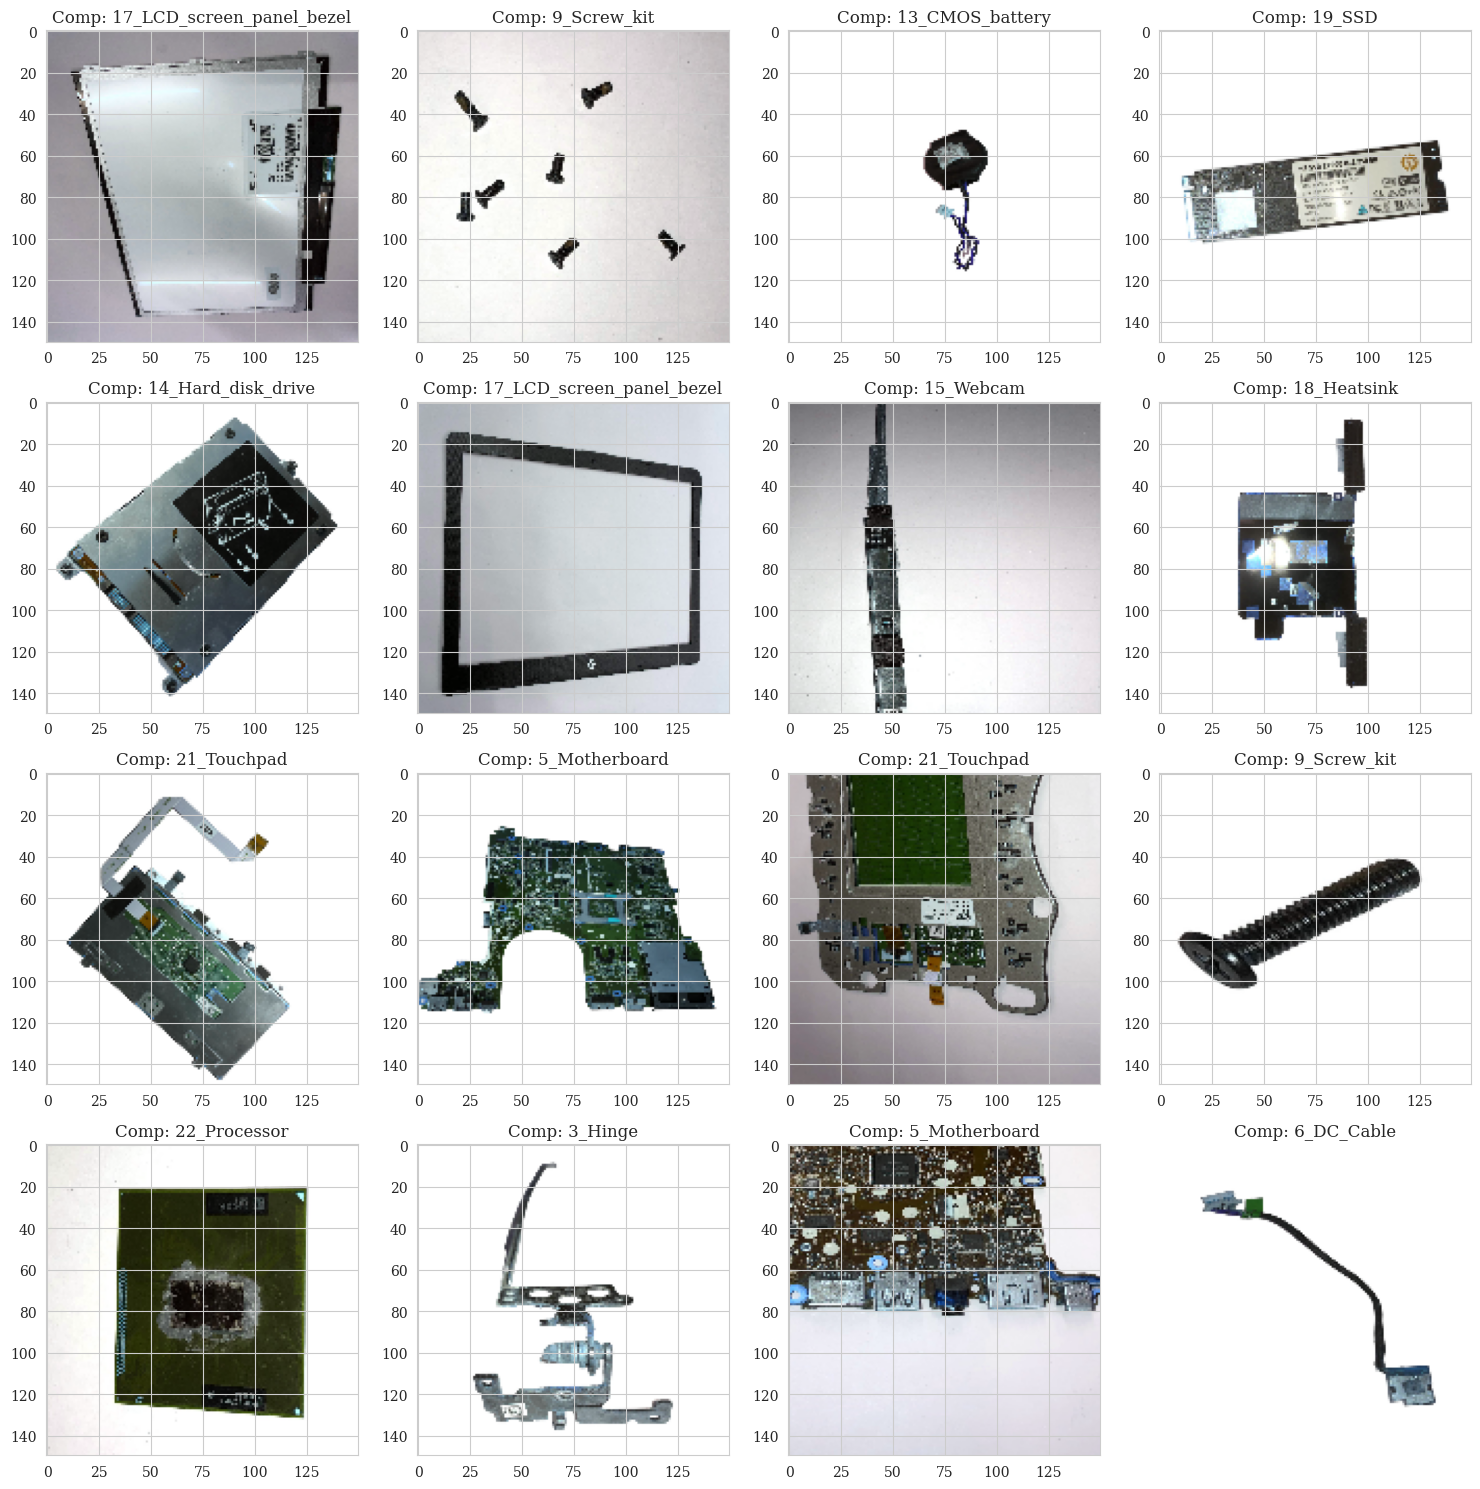

In [29]:
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (4):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Comp: '+categories[y[l]])
plt.axis('off')        
plt.tight_layout()

Reshaping and normalizing: the need of resizing the feature vetcor x is to meet the keras requirement and normalization is done to scale all the values in a similar range¶


In [30]:
X=np.array(X).reshape(-1,150,150,3)/255.0

**Class destribution**

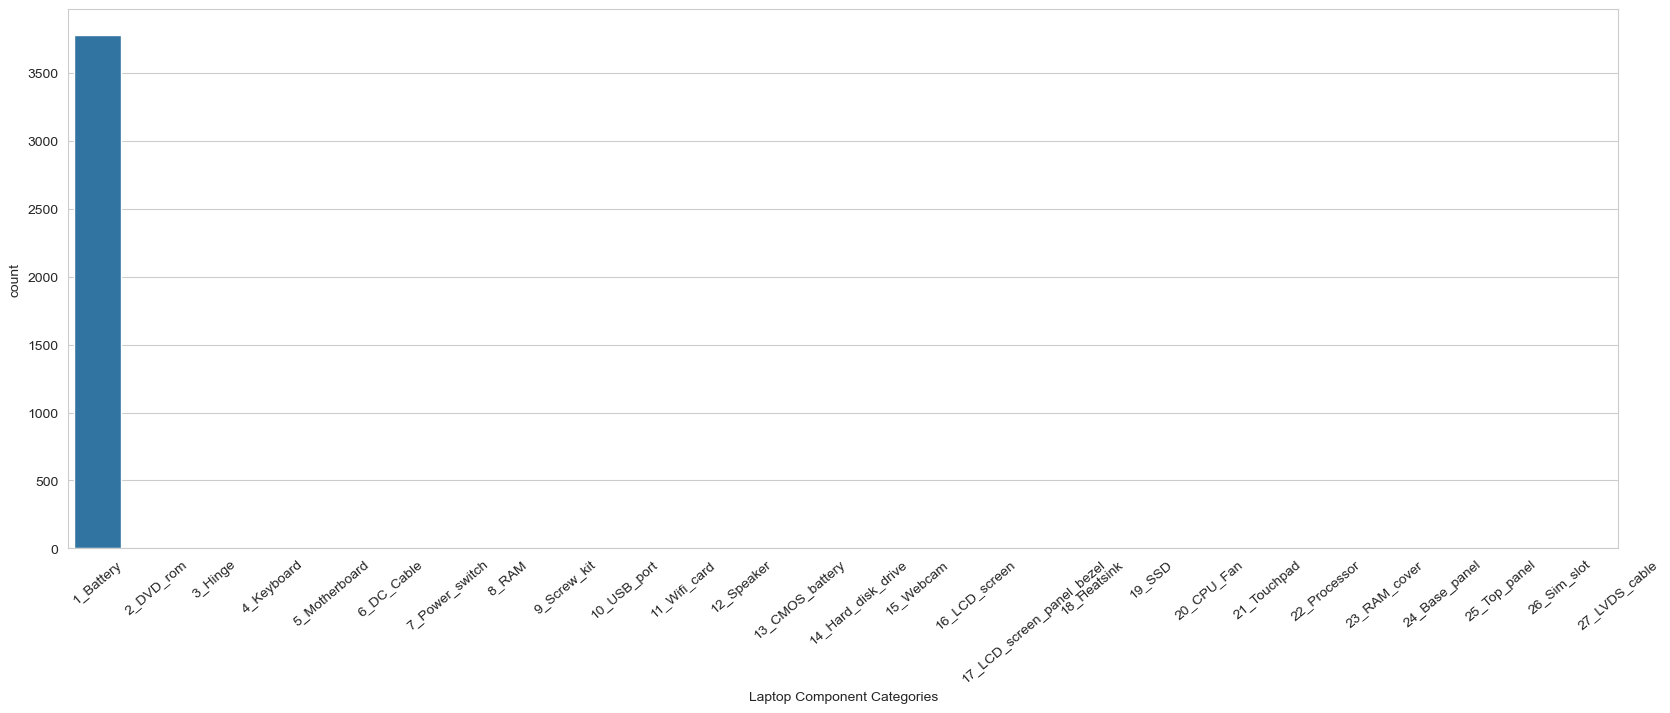

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(categories)), xticklabels=[i for i in categories])
plt.xticks(rotation=40)
plt.xlabel('Laptop Component Categories')
plt.show()

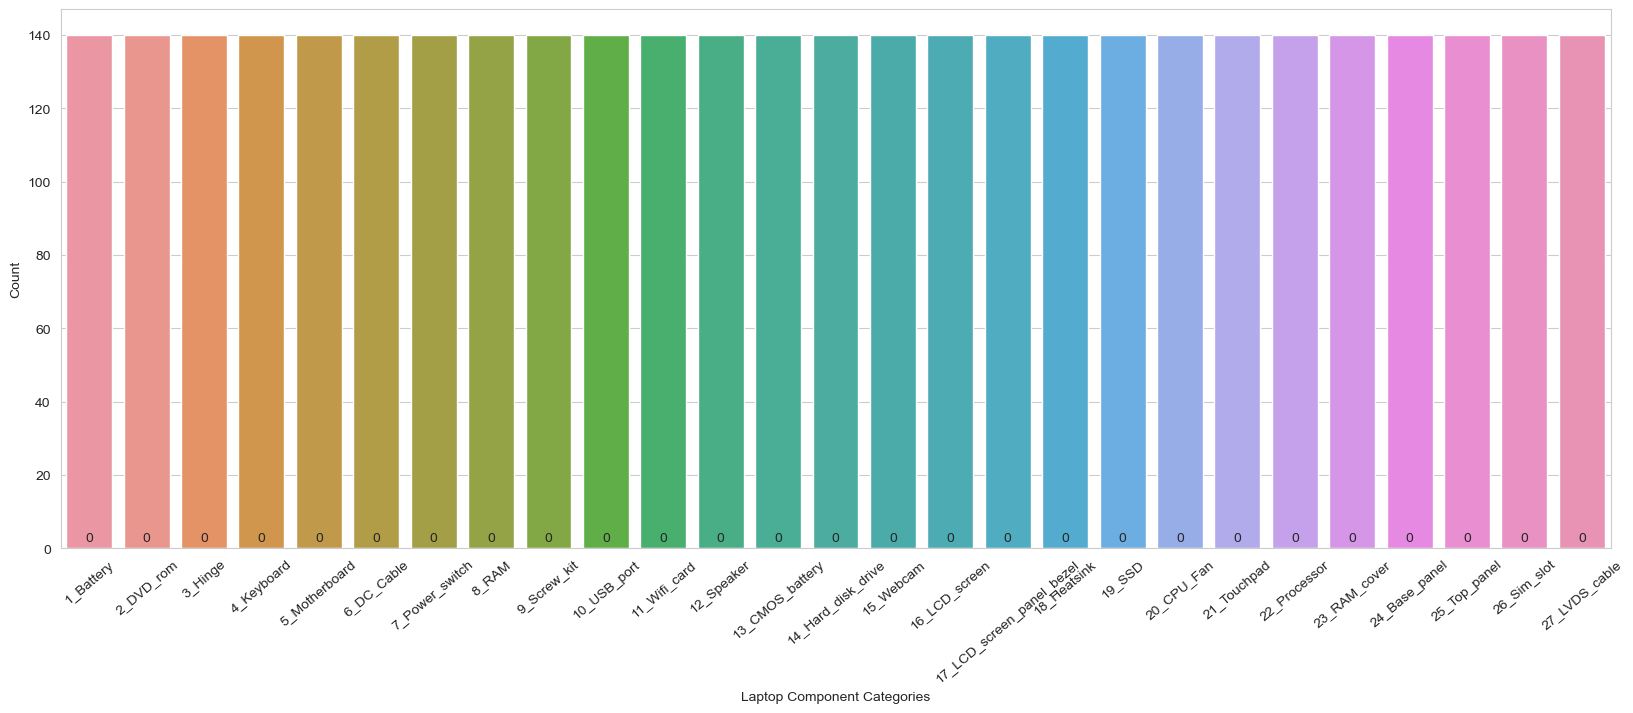

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

category_counts = [y.count(i) for i in categories]

sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
fig = sns.countplot(x=y)
plt.ylabel('Count')
plt.xlabel('Laptop Component Categories')
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=40)

for i, count in enumerate(category_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


In [33]:
list1_Battery=len([i for i in y if i==0])
list2_DVD_rom=len([i for i in y if i==1])
list3_Hinge=len([i for i in y if i==2])
list4_Keyboard=len([ i for i in y if i==3])
list5_Motherboard=len([i for i in y if i==4])
list6_Dc_Cable = len([i for i in y if i==5])
list7_Power_switch=len([i for i in y if i==6])
list_8_RAM=len([i for i in y if i==7])
list9_Screw_kit=len([i for i in y if i==8])
list_10_USB=len([ i for i in y if i==9])
list11_Wifi_card=len([i for i in y if i==10])
list12_Speaker = len([i for i in y if i==11])
list13_CMOS_battery=len([i for i in y if i==12])
list14_Hard_disk_drive=len([i for i in y if i==13])
list15_Webcam=len([i for i in y if i==14])
list16_LCD_screen=len([i for i in y if i==15])
list17_LCD_screen_panel_bezel=len([i for i in y if i==16])
list18_Heatsink=len([i for i in y if i==17])
list19_SSD=len([i for i in y if i==18])
list20_CPU_Fan=len([i for i in y if i==19])
list21_Touchpad=len([i for i in y if i==20])
list22_Processor=len([i for i in y if i==21])
list23_RAM_cover=len([i for i in y if i==22])
list24_Back_Part=len([i for i in y if i==23])
list25_Front_Part=len([i for i in y if i==24])
list26_Sim_slot=len([i for i in y if i==25])
list27_LCD_LED_LVDS_DisplayRibbon =len([i for i in y if i==26])



list_species=[list1_Battery,list2_DVD_rom,list3_Hinge,list4_Keyboard,list5_Motherboard,list6_Dc_Cable,
              list7_Power_switch,list_8_RAM, list9_Screw_kit,list_10_USB, list11_Wifi_card, list12_Speaker, list13_CMOS_battery,
              list14_Hard_disk_drive, list15_Webcam, list16_LCD_screen, list17_LCD_screen_panel_bezel, list18_Heatsink,
              list19_SSD,list20_CPU_Fan,list21_Touchpad,list22_Processor,list23_RAM_cover,list24_Back_Part,list25_Front_Part,
              list26_Sim_slot,list27_LCD_LED_LVDS_DisplayRibbon]

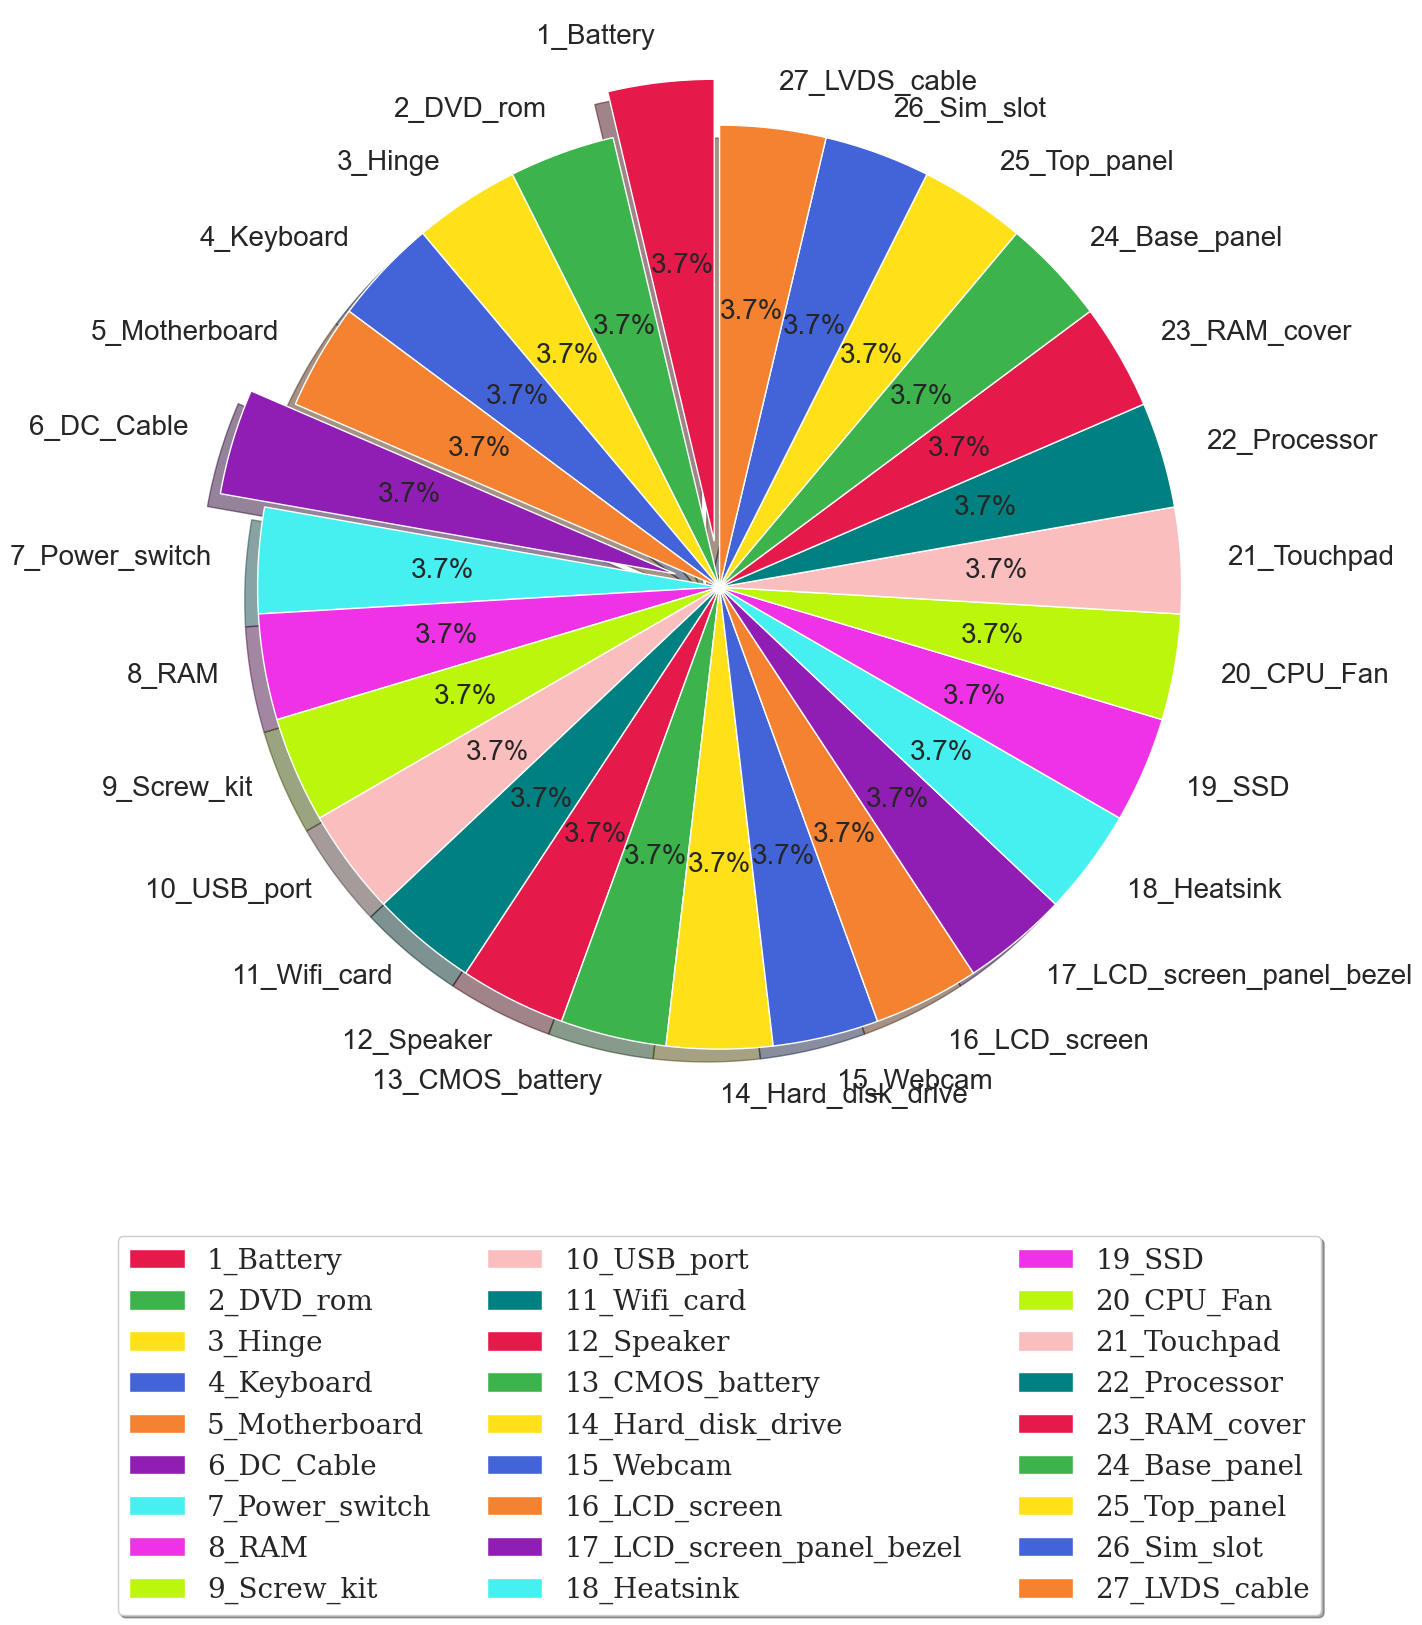

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,15))
plt.pie(list_species,labels=categories,startangle=90,colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080'],
        autopct='%1.1f%%',explode = (0.1,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True,textprops={'fontsize': 20})

# plt.title('Percentage of images per class', fontsize = 40)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),prop={'size': 20},
          fancybox=True, shadow=True, ncol=3)
plt.show()

In [35]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

**Train Test split**

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=12)

In [37]:
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (3024, 150, 150, 3)
Shape of y_train (3024, 27)
Shape of x_test (756, 150, 150, 3)
Shape of y_test (756, 27)


**CNN Model**

In [38]:
def cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(input_shape)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(2, 2, padding="same"))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(2, 2, padding="same"))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(2, 2, padding="same"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(27, activation="softmax"))
    model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

**Augmentation to avoid overfitting**

In [39]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

**Callbacks**

In [40]:
keras.backend.clear_session()
#callback function for early stopping

accuracy_threshold = 0.99999

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>99.99):
            print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
            self.model.stop_training = True

acc_callback = myCallback()

In [41]:
checkpoint_path = r'F:\Research Works\Laptop_components\New folder'
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    acc_callback
]

In [42]:
#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=50, BATCH_SIZE=64):
    model = None
    input_shape = 150,150,3
    model = cnn_model(input_shape)
    results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),
                              epochs = EPOCHS, validation_data = (val_x,val_y),
                              callbacks= callbacks,
                              verbose = 1, steps_per_epoch= t_x.shape[0] // 128)
    
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [20]:
n_folds=2
epochs = 50
batch_size = 32

model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")


Training on Fold:  1


F:\anaconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\rupin\AppData\Local\Temp\ipykernel_10944\1554674886.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),


Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 3.6322 - accuracy: 0.0382
Epoch 1: val_loss improved from inf to 3.29545, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 36s 2s/step - loss: 3.6322 - accuracy: 0.0382 - val_loss: 3.2954 - val_accuracy: 0.0347 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 3.2969 - accuracy: 0.0365
Epoch 2: val_loss did not improve from 3.29545
18/18 [==============================] - 15s 816ms/step - loss: 3.2969 - accuracy: 0.0365 - val_loss: 3.2978 - val_accuracy: 0.0198 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 3.2987 - accuracy: 0.0391
Epoch 3: val_loss did not improve from 3.29545
18/18 [==============================] - 14s 796ms/step - loss: 3.2987 - accuracy: 0.0391 - val_loss: 3.2963 - val_accuracy: 0.0331 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 3.2949 - accuracy: 0.0295
Epoch 4: val_loss improved from 3.29545 to 3.28801, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 3.2949 - accuracy: 0.0295 - val_loss: 3.2880 - val_accuracy: 0.0298 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - ETA: 0s - loss: 3.2690 - accuracy: 0.0434
Epoch 5: val_loss improved from 3.28801 to 3.23748, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 3.2690 - accuracy: 0.0434 - val_loss: 3.2375 - val_accuracy: 0.0380 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - ETA: 0s - loss: 3.2242 - accuracy: 0.0657
Epoch 6: val_loss improved from 3.23748 to 3.20064, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 3.2242 - accuracy: 0.0657 - val_loss: 3.2006 - val_accuracy: 0.0529 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - ETA: 0s - loss: 3.1988 - accuracy: 0.0816
Epoch 7: val_loss improved from 3.20064 to 3.14674, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 3.1988 - accuracy: 0.0816 - val_loss: 3.1467 - val_accuracy: 0.0744 - lr: 0.0010
Epoch 8/50
18/18 [==============================] - ETA: 0s - loss: 3.1509 - accuracy: 0.0851
Epoch 8: val_loss did not improve from 3.14674
18/18 [==============================] - 15s 807ms/step - loss: 3.1509 - accuracy: 0.0851 - val_loss: 3.3808 - val_accuracy: 0.0347 - lr: 0.0010
Epoch 9/50
18/18 [==============================] - ETA: 0s - loss: 3.0979 - accuracy: 0.0693
Epoch 9: val_loss improved from 3.14674 to 3.05757, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 3.0979 - accuracy: 0.0693 - val_loss: 3.0576 - val_accuracy: 0.1074 - lr: 0.0010
Epoch 10/50
18/18 [==============================] - ETA: 0s - loss: 3.0362 - accuracy: 0.1354
Epoch 10: val_loss improved from 3.05757 to 3.04108, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 22s 1s/step - loss: 3.0362 - accuracy: 0.1354 - val_loss: 3.0411 - val_accuracy: 0.0942 - lr: 0.0010
Epoch 11/50
18/18 [==============================] - ETA: 0s - loss: 3.0282 - accuracy: 0.1007
Epoch 11: val_loss improved from 3.04108 to 2.95032, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 22s 1s/step - loss: 3.0282 - accuracy: 0.1007 - val_loss: 2.9503 - val_accuracy: 0.0893 - lr: 0.0010
Epoch 12/50
18/18 [==============================] - ETA: 0s - loss: 2.9816 - accuracy: 0.0995
Epoch 12: val_loss did not improve from 2.95032
18/18 [==============================] - 14s 798ms/step - loss: 2.9816 - accuracy: 0.0995 - val_loss: 2.9796 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 13/50
18/18 [==============================] - ETA: 0s - loss: 2.9230 - accuracy: 0.1424
Epoch 13: val_loss did not improve from 2.95032
18/18 [==============================] - 14s 792ms/step - loss: 2.9230 - accuracy: 0.1424 - val_loss: 2.9624 - val_accuracy: 0.1471 - lr: 0.0010
Epoch 14/50
18/18 [==============================] - ETA: 0s - loss: 2.8939 - accuracy: 0.1510
Epoch 14: val_loss improved from 2.95032 to 2.90028, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 20s 1s/step - loss: 2.8939 - accuracy: 0.1510 - val_loss: 2.9003 - val_accuracy: 0.1421 - lr: 0.0010
Epoch 15/50
18/18 [==============================] - ETA: 0s - loss: 2.8078 - accuracy: 0.1492
Epoch 15: val_loss improved from 2.90028 to 2.73387, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 2.8078 - accuracy: 0.1492 - val_loss: 2.7339 - val_accuracy: 0.2165 - lr: 0.0010
Epoch 16/50
18/18 [==============================] - ETA: 0s - loss: 2.7749 - accuracy: 0.1649
Epoch 16: val_loss improved from 2.73387 to 2.67066, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 2.7749 - accuracy: 0.1649 - val_loss: 2.6707 - val_accuracy: 0.1686 - lr: 0.0010
Epoch 17/50
18/18 [==============================] - ETA: 0s - loss: 2.6642 - accuracy: 0.1901
Epoch 17: val_loss improved from 2.67066 to 2.62409, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 2.6642 - accuracy: 0.1901 - val_loss: 2.6241 - val_accuracy: 0.1917 - lr: 0.0010
Epoch 18/50
18/18 [==============================] - ETA: 0s - loss: 2.6857 - accuracy: 0.1794
Epoch 18: val_loss did not improve from 2.62409
18/18 [==============================] - 15s 797ms/step - loss: 2.6857 - accuracy: 0.1794 - val_loss: 2.7876 - val_accuracy: 0.1488 - lr: 0.0010
Epoch 19/50
18/18 [==============================] - ETA: 0s - loss: 2.5826 - accuracy: 0.1719
Epoch 19: val_loss did not improve from 2.62409
18/18 [==============================] - 16s 878ms/step - loss: 2.5826 - accuracy: 0.1719 - val_loss: 2.7052 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 20/50
18/18 [==============================] - ETA: 0s - loss: 2.5965 - accuracy: 0.2135
Epoch 20: val_loss improved from 2.62409 to 2.36919, saving model to F:\Research Works\Laptop_components\New folder


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 2.5965 - accuracy: 0.2135 - val_loss: 2.3692 - val_accuracy: 0.2479 - lr: 0.0010
Epoch 21/50
18/18 [==============================] - ETA: 0s - loss: 2.3821 - accuracy: 0.2951
Epoch 21: val_loss did not improve from 2.36919
18/18 [==============================] - 15s 838ms/step - loss: 2.3821 - accuracy: 0.2951 - val_loss: 2.6670 - val_accuracy: 0.1868 - lr: 0.0010
Epoch 22/50
18/18 [==============================] - ETA: 0s - loss: 2.4383 - accuracy: 0.2326
Epoch 22: val_loss did not improve from 2.36919
18/18 [==============================] - 15s 821ms/step - loss: 2.4383 - accuracy: 0.2326 - val_loss: 3.1843 - val_accuracy: 0.1289 - lr: 0.0010
Epoch 23/50
18/18 [==============================] - ETA: 0s - loss: 2.4270 - accuracy: 0.2222
Epoch 23: val_loss did not improve from 2.36919
18/18 [==============================] - 15s 816ms/step - loss: 2.4270 - accuracy: 0.2222 - val_loss: 2.7435 - val_accuracy: 0.1636 - lr: 0

INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\New folder\assets


18/18 [==============================] - 21s 1s/step - loss: 2.1251 - accuracy: 0.3286 - val_loss: 2.2603 - val_accuracy: 0.2760 - lr: 1.0000e-04
Epoch 29/50
18/18 [==============================] - ETA: 0s - loss: 2.1963 - accuracy: 0.2986
Epoch 29: val_loss did not improve from 2.26032
18/18 [==============================] - 14s 799ms/step - loss: 2.1963 - accuracy: 0.2986 - val_loss: 2.4485 - val_accuracy: 0.2331 - lr: 1.0000e-04
Epoch 30/50
18/18 [==============================] - ETA: 0s - loss: 2.1275 - accuracy: 0.3229
Epoch 30: val_loss did not improve from 2.26032
18/18 [==============================] - 15s 821ms/step - loss: 2.1275 - accuracy: 0.3229 - val_loss: 2.3139 - val_accuracy: 0.2661 - lr: 1.0000e-04
Epoch 31/50
18/18 [==============================] - ETA: 0s - loss: 2.1341 - accuracy: 0.3264
Epoch 31: val_loss did not improve from 2.26032
18/18 [==============================] - 15s 808ms/step - loss: 2.1341 - accuracy: 0.3264 - val_loss: 2.3321 - val_accuracy: 0.

F:\anaconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\rupin\AppData\Local\Temp\ipykernel_10944\1554674886.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),


Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 3.6968 - accuracy: 0.0434
Epoch 1: val_loss did not improve from 2.26032
18/18 [==============================] - 23s 884ms/step - loss: 3.6968 - accuracy: 0.0434 - val_loss: 3.2970 - val_accuracy: 0.0430 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 3.2995 - accuracy: 0.0462
Epoch 2: val_loss did not improve from 2.26032
18/18 [==============================] - 14s 806ms/step - loss: 3.2995 - accuracy: 0.0462 - val_loss: 3.2964 - val_accuracy: 0.0198 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 3.2960 - accuracy: 0.0330
Epoch 3: val_loss did not improve from 2.26032
18/18 [==============================] - 15s 814ms/step - loss: 3.2960 - accuracy: 0.0330 - val_loss: 3.2967 - val_accuracy: 0.0231 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 3.2955 - accuracy: 0.0409
Epoch 4: val_loss did not improve from 2.26032
1

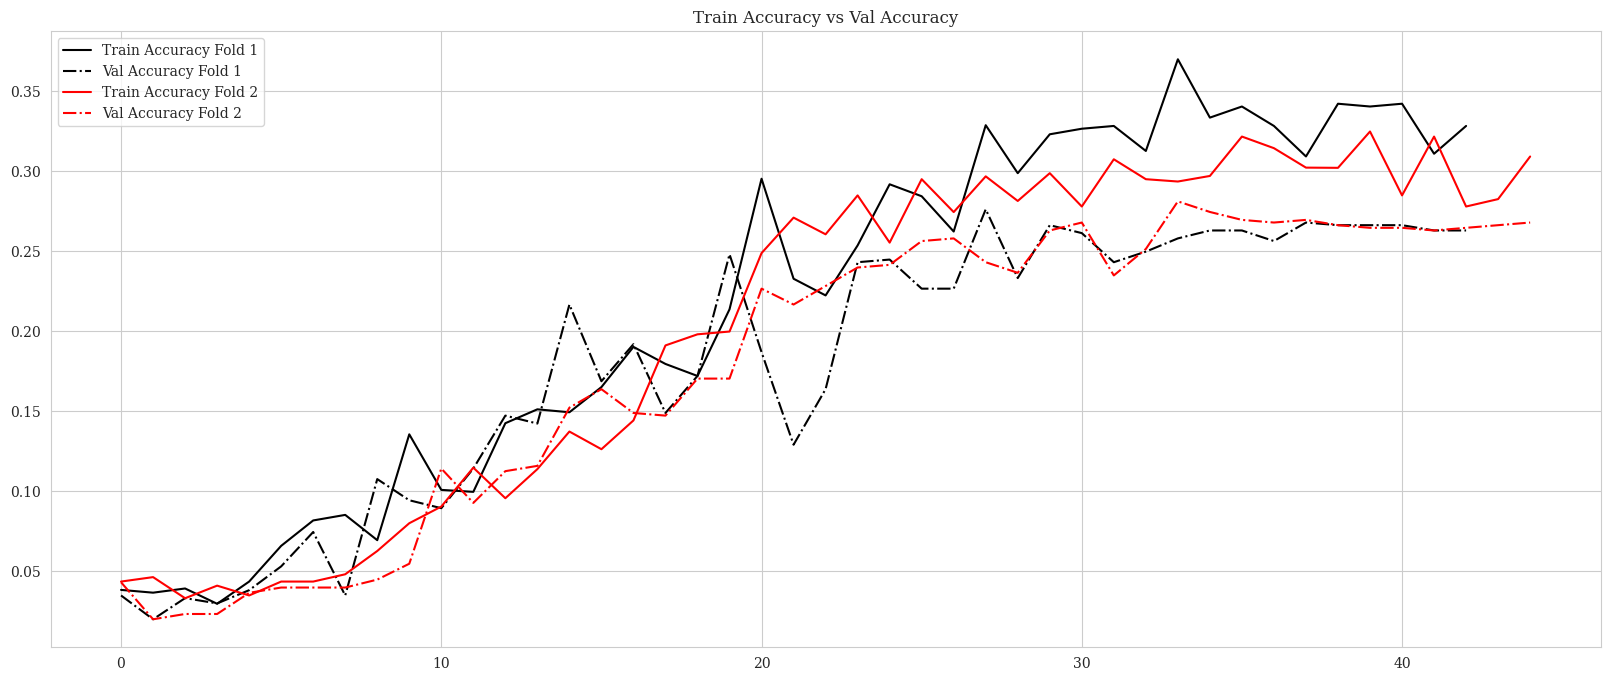

In [21]:
plt.figure(figsize=(20, 8))
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

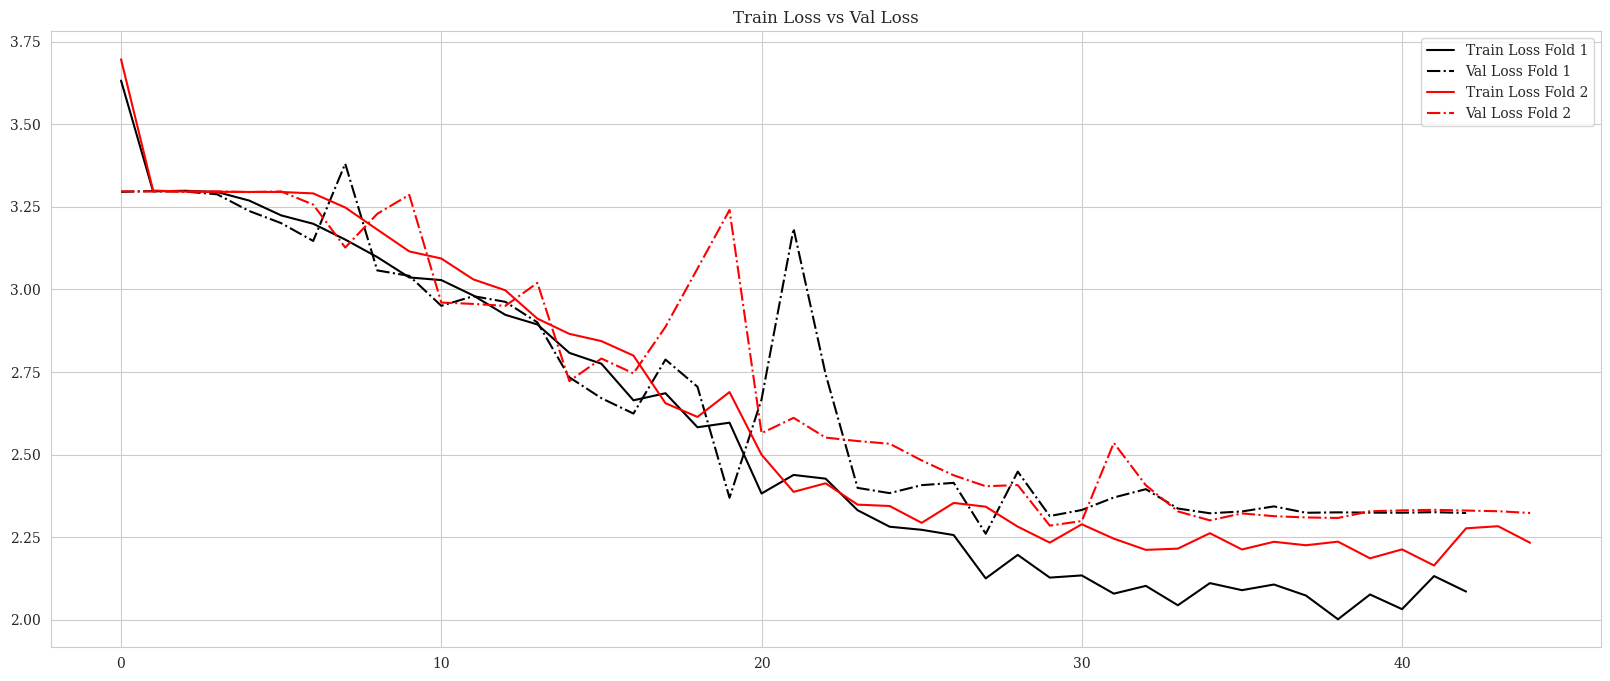

In [22]:
plt.figure(figsize=(20, 8))
plt.title('Train Loss vs Val Loss')
plt.plot(model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

In [23]:
#Load the model that was saved by ModelCheckpoint
nFoldCnnModel = load_model(r'F:\Research Works\Laptop_components\comp_kfold_class_27.h5')
preds=nFoldCnnModel.predict(x_test)
predictions=np.argmax(preds,axis=1)

OSError: No file or directory found at F:\Research Works\Laptop_components\comp_kfold_class_27.h5

In [ ]:
from sklearn.metrics import classification_report
Y_test =np.argmax(y_test,axis=1)
print(classification_report(Y_test, predictions))

In [ ]:
def report_generate(Y_test, predictions):
    report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = predictions, output_dict=True)).transpose()
    report = report.rename(index={'0': '1_Battery','1':'2_DVD rom','2':'3_Hinge',
                                '3':'4_Keyboard', '4':'5_Motherboard', '5':'6_Dc Cable',
                               '6': '7_Power switch','7':'8_RAM','8':'9_Screw kit',
                                '9':'10_USB port', '10':'11_Wifi card', '11': '12_Speaker','12':'13_CMOS battery','13':'14_Hard disk drive',
                                '14':'15_Webcam', '15':'16_LCD screen', '16':'17_LCD screen panel or bezel',
                               '17': '18_ Heatsink','18':'19_SSD','19':'20_CPU Fan',
                                '20':'21_Touchpad', '21':'22_Processor','22': '23_RAM cover','23':'24_Back Part','24':'25_Front Part',
                                '25':'26_Sim slot', '26':'27_LVDS_cable'})
    report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
    report=report.drop(["support"],axis=1)
    columns = ['precision','recall','f1-score']
    report.columns = columns
    plt = report.plot(kind='bar',figsize=(12,6))
    plot=plt.tick_params(rotation=40)
    return plot,report

In [ ]:
report_generate(Y_test, predictions)

In [ ]:
#confusion matrix
def conf_matrix(Y_test, y_pred):
    cm = confusion_matrix(Y_test, y_pred) 
# Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                       index = ['1_Battery','2_DVD rom','3_Hinge', '4_Keyboard', '5_Motherboard', '6_Dc Cable', '7_Power switch', '8_RAM', 
            '9_Screw kit','10_USB port', '11_Wifi card','12_Speaker','13_CMOS battery','14_Hard disk drive','15_Webcam',
            '16_LCD screen','17_LCD screen panel or bezel','18_ Heatsink','19_SSD','20_CPU Fan','21_Touchpad','22_Processor',
            '23_RAM cover','24_Back Part','25_Front Part','26_Sim slot','27_LVDS_cable'], 
                       columns = ['1_Battery','2_DVD rom','3_Hinge', '4_Keyboard', '5_Motherboard', '6_Dc Cable', '7_Power switch', '8_RAM', 
            '9_Screw kit','10_USB port', '11_Wifi card','12_Speaker','13_CMOS battery','14_Hard disk drive','15_Webcam',
            '16_LCD screen','17_LCD screen panel or bezel','18_ Heatsink','19_SSD','20_CPU Fan','21_Touchpad','22_Processor',
            '23_RAM cover','24_Back Part','25_Front Part','26_Sim slot','27_LVDS_cable'])
    plt.figure(figsize=(10,7))
    sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    plt.show()
    plt.close()



In [ ]:
conf_matrix(Y_test,predictions)

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(Y_test,predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


In [ ]:
correct_class=[]
incorrect_class=[]
i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==predictions[i]):
        correct_class.append(i)
    if(len(correct_class)==16):
        break

count=0
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (4):
        ax[i,j].imshow(x_test[correct_class[count]])
        ax[i,j].set_title("Predicted : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual : "+ categories[np.argmax(y_test[correct_class[count]])])
        plt.tight_layout()
        count+=1

In [ ]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==16):
        break


In [ ]:
count=0
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_test[incorrect_class[count]])
        ax[i,j].set_title("Predicted : " + categories[predictions[incorrect_class[count]]] + "\n"+"Actual : " +categories[np.argmax(y_test[incorrect_class[count]])])
        plt.tight_layout()
        count+=1

# VGG16

In [ ]:
def vgg_model(input_shape):
    Base_model = VGG16(include_top= False, weights='imagenet',input_shape = (input_shape), pooling='avg')
    VGG16_model = Sequential()
    VGG16_model.add(Base_model)
    VGG16_model.add(Dense(256,activation='relu'))
    # adding prediction(softmax) layer
    VGG16_model.add(Dense(27,activation="softmax"))
    VGG16_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    VGG16_model.summary()
    return VGG16_model

In [ ]:
#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=50, BATCH_SIZE=32):
    model = None
    input_shape = 150,150,3
    model = vgg_model(input_shape)
    results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),
                              epochs = EPOCHS, validation_data = (val_x,val_y),
                              callbacks= callbacks,
                              verbose = 1, steps_per_epoch= t_x.shape[0] // 128)
    
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [ ]:
checkpoint_path = r'F:\Research Works\Laptop_components\New folder\K-fold-27_VGG16.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    acc_callback
]

In [ ]:
n_folds=2
epochs = 50
batch_size = 32

VGG_model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    VGG_model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(VGG_model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(VGG_model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(VGG_model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(VGG_model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Train Loss vs Val Loss')
plt.plot(VGG_model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(VGG_model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(VGG_model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(VGG_model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

In [ ]:
#Load the model that was saved by ModelCheckpoint
nFoldVGG16Model = load_model(r'F:\Research Works\Laptop_components\New folder\K-fold-27_VGG16.h5')
preds=nFoldVGG16Model.predict(x_test)
predictions=np.argmax(preds,axis=1)

In [ ]:
from sklearn.metrics import classification_report
Y_test =np.argmax(y_test,axis=1)
print(classification_report(Y_test, predictions))

In [ ]:
report_generate(Y_test, predictions)

In [ ]:
conf_matrix(Y_test,predictions)

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(Y_test,predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


# Inception V3

In [43]:
from tensorflow.keras.applications import InceptionV3

In [44]:
def incV3_model(input_shape):
    IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (input_shape))
    model = Sequential()
    model.add(IncV3)
    for layer in model.layers:
        layer.trainable = False
    model.add(Flatten())
    model.add(Dense(units = 2048, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(units = 27, activation = "softmax"))
    
    model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

In [45]:
#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=50, BATCH_SIZE=32):
    model = None
    input_shape = 150,150,3
    model = incV3_model(input_shape)
    results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),
                              epochs = EPOCHS, validation_data = (val_x,val_y),
                              callbacks= callbacks,
                              verbose = 1, steps_per_epoch= t_x.shape[0] // 128)
    
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [46]:
checkpoint_path = r'F:\Research Works\Laptop_components\inception'
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    acc_callback
]

In [47]:
n_folds=2
epochs = 50
batch_size = 32

INCV3_model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    INCV3_model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
87910968/87910968 [==============================] - 115s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2048)              37750784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 27)                55323     
                                                                 
Total params: 59,608,891
Trainable params: 37,806,107
Non-trainable params: 21,802,784
_____________

F:\anaconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\rupin\AppData\Local\Temp\ipykernel_10944\394290810.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),


Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 48.3120 - accuracy: 0.1030
Epoch 1: val_loss improved from inf to 21.58352, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 131s 7s/step - loss: 48.3120 - accuracy: 0.1030 - val_loss: 21.5835 - val_accuracy: 0.2860 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 15.3936 - accuracy: 0.2664
Epoch 2: val_loss improved from 21.58352 to 2.80983, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 110s 6s/step - loss: 15.3936 - accuracy: 0.2664 - val_loss: 2.8098 - val_accuracy: 0.4727 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 2.9488 - accuracy: 0.4184
Epoch 3: val_loss improved from 2.80983 to 1.60712, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 111s 6s/step - loss: 2.9488 - accuracy: 0.4184 - val_loss: 1.6071 - val_accuracy: 0.5306 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 1.9867 - accuracy: 0.4340
Epoch 4: val_loss improved from 1.60712 to 1.43193, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 111s 6s/step - loss: 1.9867 - accuracy: 0.4340 - val_loss: 1.4319 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - ETA: 0s - loss: 1.9305 - accuracy: 0.4654
Epoch 5: val_loss improved from 1.43193 to 1.31318, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 114s 7s/step - loss: 1.9305 - accuracy: 0.4654 - val_loss: 1.3132 - val_accuracy: 0.6380 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - ETA: 0s - loss: 1.8279 - accuracy: 0.5062
Epoch 6: val_loss improved from 1.31318 to 1.20687, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 104s 6s/step - loss: 1.8279 - accuracy: 0.5062 - val_loss: 1.2069 - val_accuracy: 0.6810 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - ETA: 0s - loss: 1.5932 - accuracy: 0.5222
Epoch 7: val_loss did not improve from 1.20687
18/18 [==============================] - 22s 1s/step - loss: 1.5932 - accuracy: 0.5222 - val_loss: 1.2244 - val_accuracy: 0.6248 - lr: 0.0010
Epoch 8/50
18/18 [==============================] - ETA: 0s - loss: 1.6803 - accuracy: 0.5293
Epoch 8: val_loss improved from 1.20687 to 1.18982, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 94s 5s/step - loss: 1.6803 - accuracy: 0.5293 - val_loss: 1.1898 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 9/50
18/18 [==============================] - ETA: 0s - loss: 1.4482 - accuracy: 0.5684
Epoch 9: val_loss improved from 1.18982 to 1.02535, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 93s 5s/step - loss: 1.4482 - accuracy: 0.5684 - val_loss: 1.0253 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 10/50
18/18 [==============================] - ETA: 0s - loss: 1.5373 - accuracy: 0.5684
Epoch 10: val_loss did not improve from 1.02535
18/18 [==============================] - 23s 1s/step - loss: 1.5373 - accuracy: 0.5684 - val_loss: 1.0849 - val_accuracy: 0.6777 - lr: 0.0010
Epoch 11/50
18/18 [==============================] - ETA: 0s - loss: 1.3965 - accuracy: 0.6021
Epoch 11: val_loss improved from 1.02535 to 1.01105, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 1.3965 - accuracy: 0.6021 - val_loss: 1.0111 - val_accuracy: 0.7025 - lr: 0.0010
Epoch 12/50
18/18 [==============================] - ETA: 0s - loss: 1.5439 - accuracy: 0.5521
Epoch 12: val_loss did not improve from 1.01105
18/18 [==============================] - 23s 1s/step - loss: 1.5439 - accuracy: 0.5521 - val_loss: 1.0547 - val_accuracy: 0.6992 - lr: 0.0010
Epoch 13/50
18/18 [==============================] - ETA: 0s - loss: 1.5116 - accuracy: 0.5712
Epoch 13: val_loss improved from 1.01105 to 0.97396, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 96s 6s/step - loss: 1.5116 - accuracy: 0.5712 - val_loss: 0.9740 - val_accuracy: 0.7140 - lr: 0.0010
Epoch 14/50
18/18 [==============================] - ETA: 0s - loss: 1.4542 - accuracy: 0.5816
Epoch 14: val_loss did not improve from 0.97396
18/18 [==============================] - 23s 1s/step - loss: 1.4542 - accuracy: 0.5816 - val_loss: 0.9948 - val_accuracy: 0.7041 - lr: 0.0010
Epoch 15/50
18/18 [==============================] - ETA: 0s - loss: 1.2670 - accuracy: 0.6441
Epoch 15: val_loss improved from 0.97396 to 0.90546, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 94s 5s/step - loss: 1.2670 - accuracy: 0.6441 - val_loss: 0.9055 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 16/50
18/18 [==============================] - ETA: 0s - loss: 1.3179 - accuracy: 0.6042
Epoch 16: val_loss did not improve from 0.90546
18/18 [==============================] - 24s 1s/step - loss: 1.3179 - accuracy: 0.6042 - val_loss: 0.9244 - val_accuracy: 0.7339 - lr: 0.0010
Epoch 17/50
18/18 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.5833
Epoch 17: val_loss improved from 0.90546 to 0.84469, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 96s 6s/step - loss: 1.3853 - accuracy: 0.5833 - val_loss: 0.8447 - val_accuracy: 0.7603 - lr: 0.0010
Epoch 18/50
18/18 [==============================] - ETA: 0s - loss: 1.2032 - accuracy: 0.6319
Epoch 18: val_loss did not improve from 0.84469
18/18 [==============================] - 24s 1s/step - loss: 1.2032 - accuracy: 0.6319 - val_loss: 0.8860 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 19/50
18/18 [==============================] - ETA: 0s - loss: 1.2520 - accuracy: 0.6233
Epoch 19: val_loss did not improve from 0.84469
18/18 [==============================] - 26s 1s/step - loss: 1.2520 - accuracy: 0.6233 - val_loss: 0.9068 - val_accuracy: 0.7339 - lr: 0.0010
Epoch 20/50
18/18 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.6128
Epoch 20: val_loss did not improve from 0.84469
18/18 [==============================] - 26s 1s/step - loss: 1.2731 - accuracy: 0.6128 - val_loss: 0.8646 - val_accuracy: 0.7570 - lr: 0.0010
Epo

INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 1.0608 - accuracy: 0.6858 - val_loss: 0.7892 - val_accuracy: 0.7934 - lr: 1.0000e-04
Epoch 25/50
18/18 [==============================] - ETA: 0s - loss: 1.0490 - accuracy: 0.6823
Epoch 25: val_loss improved from 0.78916 to 0.74669, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 1.0490 - accuracy: 0.6823 - val_loss: 0.7467 - val_accuracy: 0.8083 - lr: 1.0000e-04
Epoch 26/50
18/18 [==============================] - ETA: 0s - loss: 0.9796 - accuracy: 0.7066
Epoch 26: val_loss improved from 0.74669 to 0.72464, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 93s 5s/step - loss: 0.9796 - accuracy: 0.7066 - val_loss: 0.7246 - val_accuracy: 0.8017 - lr: 1.0000e-04
Epoch 27/50
18/18 [==============================] - ETA: 0s - loss: 0.9906 - accuracy: 0.7014
Epoch 27: val_loss improved from 0.72464 to 0.70802, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 0.9906 - accuracy: 0.7014 - val_loss: 0.7080 - val_accuracy: 0.8198 - lr: 1.0000e-04
Epoch 28/50
18/18 [==============================] - ETA: 0s - loss: 0.9088 - accuracy: 0.7158
Epoch 28: val_loss did not improve from 0.70802
18/18 [==============================] - 24s 1s/step - loss: 0.9088 - accuracy: 0.7158 - val_loss: 0.7112 - val_accuracy: 0.7950 - lr: 1.0000e-04
Epoch 29/50
18/18 [==============================] - ETA: 0s - loss: 0.8939 - accuracy: 0.7274
Epoch 29: val_loss improved from 0.70802 to 0.69888, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 0.8939 - accuracy: 0.7274 - val_loss: 0.6989 - val_accuracy: 0.8149 - lr: 1.0000e-04
Epoch 30/50
18/18 [==============================] - ETA: 0s - loss: 0.9063 - accuracy: 0.7083
Epoch 30: val_loss did not improve from 0.69888
18/18 [==============================] - 25s 1s/step - loss: 0.9063 - accuracy: 0.7083 - val_loss: 0.6990 - val_accuracy: 0.8149 - lr: 1.0000e-04
Epoch 31/50
18/18 [==============================] - ETA: 0s - loss: 0.8979 - accuracy: 0.7153
Epoch 31: val_loss improved from 0.69888 to 0.68125, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 0.8979 - accuracy: 0.7153 - val_loss: 0.6813 - val_accuracy: 0.8132 - lr: 1.0000e-04
Epoch 32/50
18/18 [==============================] - ETA: 0s - loss: 0.7799 - accuracy: 0.7318
Epoch 32: val_loss improved from 0.68125 to 0.66521, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 0.7799 - accuracy: 0.7318 - val_loss: 0.6652 - val_accuracy: 0.8198 - lr: 1.0000e-04
Epoch 33/50
18/18 [==============================] - ETA: 0s - loss: 0.8800 - accuracy: 0.7188
Epoch 33: val_loss improved from 0.66521 to 0.65197, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 96s 6s/step - loss: 0.8800 - accuracy: 0.7188 - val_loss: 0.6520 - val_accuracy: 0.8298 - lr: 1.0000e-04
Epoch 34/50
18/18 [==============================] - ETA: 0s - loss: 0.8381 - accuracy: 0.7448
Epoch 34: val_loss improved from 0.65197 to 0.64505, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 94s 6s/step - loss: 0.8381 - accuracy: 0.7448 - val_loss: 0.6450 - val_accuracy: 0.8314 - lr: 1.0000e-04
Epoch 35/50
18/18 [==============================] - ETA: 0s - loss: 0.8479 - accuracy: 0.7326
Epoch 35: val_loss improved from 0.64505 to 0.63995, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 0.8479 - accuracy: 0.7326 - val_loss: 0.6400 - val_accuracy: 0.8264 - lr: 1.0000e-04
Epoch 36/50
18/18 [==============================] - ETA: 0s - loss: 0.8448 - accuracy: 0.7344
Epoch 36: val_loss did not improve from 0.63995
18/18 [==============================] - 24s 1s/step - loss: 0.8448 - accuracy: 0.7344 - val_loss: 0.6490 - val_accuracy: 0.8298 - lr: 1.0000e-04
Epoch 37/50
18/18 [==============================] - ETA: 0s - loss: 0.7958 - accuracy: 0.7483
Epoch 37: val_loss did not improve from 0.63995
18/18 [==============================] - 25s 1s/step - loss: 0.7958 - accuracy: 0.7483 - val_loss: 0.6551 - val_accuracy: 0.8264 - lr: 1.0000e-04
Epoch 38/50
18/18 [==============================] - ETA: 0s - loss: 0.7715 - accuracy: 0.7552
Epoch 38: val_loss did not improve from 0.63995
18/18 [==============================] - 26s 1s/step - loss: 0.7715 - accuracy: 0.7552 - val_loss: 0.6493 - val_accuracy: 0.8281 - lr

INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 94s 5s/step - loss: 0.7891 - accuracy: 0.7389 - val_loss: 0.6382 - val_accuracy: 0.8314 - lr: 1.0000e-05
Epoch 42/50
18/18 [==============================] - ETA: 0s - loss: 0.7322 - accuracy: 0.7830
Epoch 42: val_loss improved from 0.63822 to 0.63540, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 96s 6s/step - loss: 0.7322 - accuracy: 0.7830 - val_loss: 0.6354 - val_accuracy: 0.8298 - lr: 1.0000e-05
Epoch 43/50
18/18 [==============================] - ETA: 0s - loss: 0.8118 - accuracy: 0.7622
Epoch 43: val_loss did not improve from 0.63540
18/18 [==============================] - 25s 1s/step - loss: 0.8118 - accuracy: 0.7622 - val_loss: 0.6355 - val_accuracy: 0.8281 - lr: 1.0000e-05
Epoch 44/50
18/18 [==============================] - ETA: 0s - loss: 0.7301 - accuracy: 0.7760
Epoch 44: val_loss improved from 0.63540 to 0.63399, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 96s 6s/step - loss: 0.7301 - accuracy: 0.7760 - val_loss: 0.6340 - val_accuracy: 0.8298 - lr: 1.0000e-05
Epoch 45/50
18/18 [==============================] - ETA: 0s - loss: 0.7836 - accuracy: 0.7587
Epoch 45: val_loss improved from 0.63399 to 0.63214, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 96s 6s/step - loss: 0.7836 - accuracy: 0.7587 - val_loss: 0.6321 - val_accuracy: 0.8298 - lr: 1.0000e-05
Epoch 46/50
18/18 [==============================] - ETA: 0s - loss: 0.8363 - accuracy: 0.7638
Epoch 46: val_loss improved from 0.63214 to 0.63022, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 93s 5s/step - loss: 0.8363 - accuracy: 0.7638 - val_loss: 0.6302 - val_accuracy: 0.8364 - lr: 1.0000e-05
Epoch 47/50
18/18 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.8003
Epoch 47: val_loss improved from 0.63022 to 0.62903, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 95s 6s/step - loss: 0.6907 - accuracy: 0.8003 - val_loss: 0.6290 - val_accuracy: 0.8364 - lr: 1.0000e-05
Epoch 48/50
18/18 [==============================] - ETA: 0s - loss: 0.7823 - accuracy: 0.7691
Epoch 48: val_loss improved from 0.62903 to 0.62688, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 92s 5s/step - loss: 0.7823 - accuracy: 0.7691 - val_loss: 0.6269 - val_accuracy: 0.8364 - lr: 1.0000e-05
Epoch 49/50
18/18 [==============================] - ETA: 0s - loss: 0.8212 - accuracy: 0.7431
Epoch 49: val_loss improved from 0.62688 to 0.62577, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 94s 6s/step - loss: 0.8212 - accuracy: 0.7431 - val_loss: 0.6258 - val_accuracy: 0.8380 - lr: 1.0000e-05
Epoch 50/50
18/18 [==============================] - ETA: 0s - loss: 0.7300 - accuracy: 0.7709
Epoch 50: val_loss improved from 0.62577 to 0.62316, saving model to F:\Research Works\Laptop_components\inception


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


19/19 [==============================] - 10s 532ms/step - loss: 0.6232 - accuracy: 0.8364
Val Score:  [0.6231586933135986, 0.8363636136054993]


Training on Fold:  2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 2048)              37750784  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 27)                55323     
                                                                 
Total params: 59,608

F:\anaconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\rupin\AppData\Local\Temp\ipykernel_10944\394290810.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),


Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 47.8604 - accuracy: 0.0903
Epoch 1: val_loss did not improve from 0.62316
18/18 [==============================] - 47s 2s/step - loss: 47.8604 - accuracy: 0.0903 - val_loss: 18.7328 - val_accuracy: 0.2694 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 11.0297 - accuracy: 0.3247
Epoch 2: val_loss did not improve from 0.62316
18/18 [==============================] - 25s 1s/step - loss: 11.0297 - accuracy: 0.3247 - val_loss: 2.3708 - val_accuracy: 0.5240 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 2.5281 - accuracy: 0.4476
Epoch 3: val_loss did not improve from 0.62316
18/18 [==============================] - 24s 1s/step - loss: 2.5281 - accuracy: 0.4476 - val_loss: 1.4164 - val_accuracy: 0.6149 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 1.8828 - accuracy: 0.4725
Epoch 4: val_loss did not improve from 0.62316
18/18

INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


INFO:tensorflow:Assets written to: F:\Research Works\Laptop_components\inception\assets


18/18 [==============================] - 121s 7s/step - loss: 0.7114 - accuracy: 0.7951 - val_loss: 0.5849 - val_accuracy: 0.8314 - lr: 1.0000e-04
Epoch 48/50
18/18 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.8125
Epoch 48: val_loss did not improve from 0.58494
18/18 [==============================] - 25s 1s/step - loss: 0.6949 - accuracy: 0.8125 - val_loss: 0.6141 - val_accuracy: 0.8198 - lr: 1.0000e-04
Epoch 49/50
18/18 [==============================] - ETA: 0s - loss: 0.7492 - accuracy: 0.7917
Epoch 49: val_loss did not improve from 0.58494
18/18 [==============================] - 25s 1s/step - loss: 0.7492 - accuracy: 0.7917 - val_loss: 0.6266 - val_accuracy: 0.8347 - lr: 1.0000e-04
Epoch 50/50
18/18 [==============================] - ETA: 0s - loss: 0.6583 - accuracy: 0.7940
Epoch 50: val_loss did not improve from 0.58494
19/19 [==============================] - 11s 604ms/step - loss: 0.6099 - accuracy: 0.8298
Val Score:  [0.6098935604095459, 0.8297520

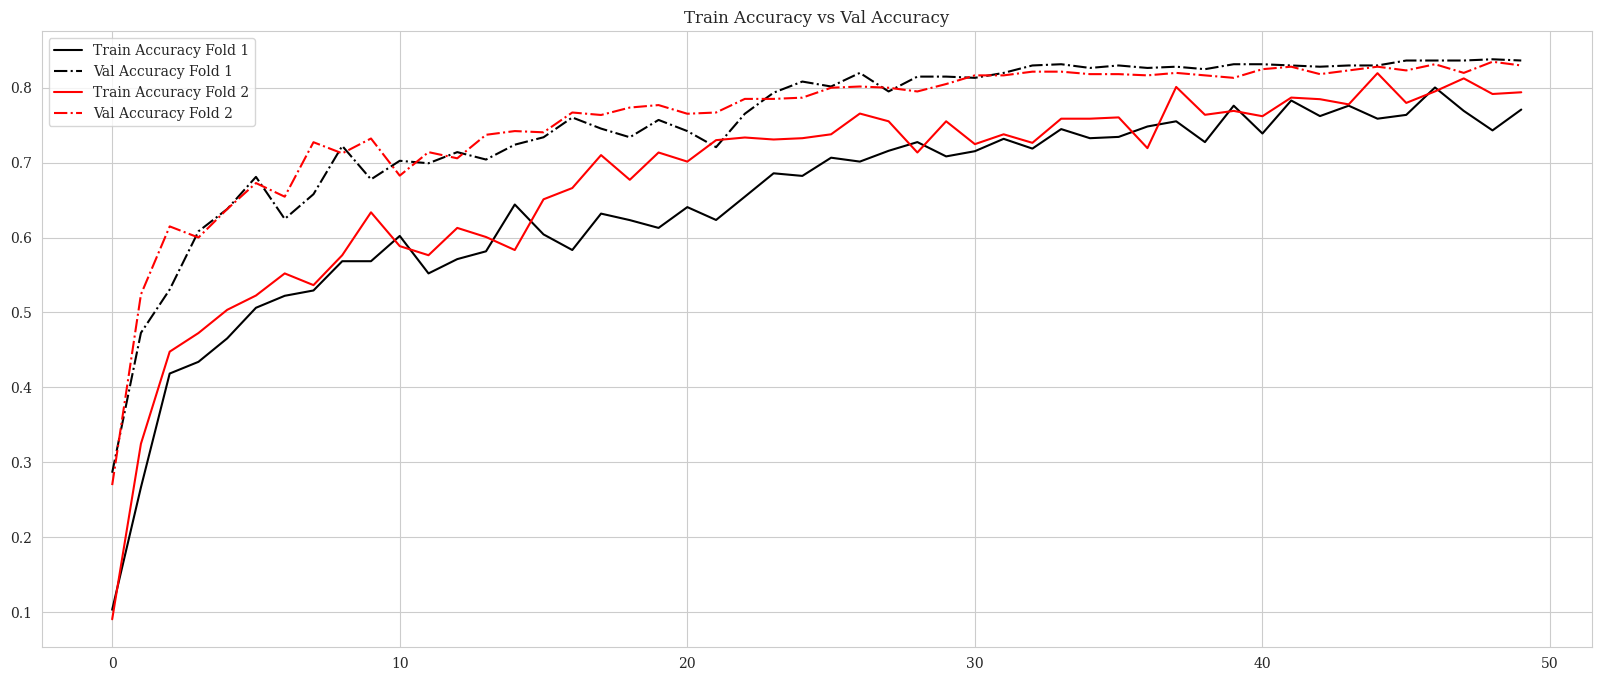

In [48]:
plt.figure(figsize=(20, 8))
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(INCV3_model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(INCV3_model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(INCV3_model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(INCV3_model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

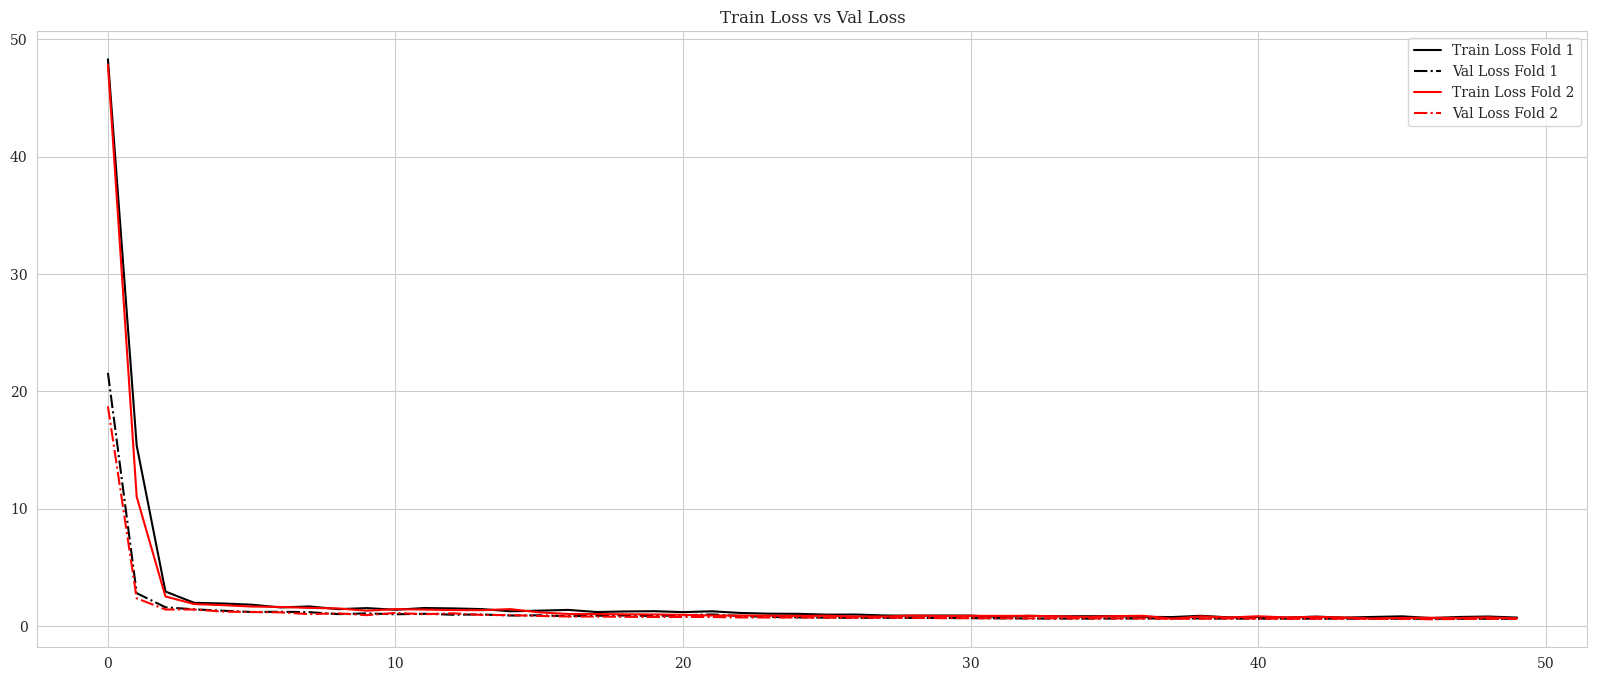

In [49]:
# sns.set(font_scale=2)
# sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
plt.title('Train Loss vs Val Loss')
plt.plot(INCV3_model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(INCV3_model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(INCV3_model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(INCV3_model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")


plt.legend()
plt.show()

In [51]:
#Load the model that was saved by ModelCheckpoint
nFoldIncV3Model = load_model(r'F:\Research Works\Laptop_components\inception')
preds = nFoldIncV3Model.predict(x_test)
predictions=np.argmax(preds,axis=1)

24/24 [==============================] - 19s 579ms/step


In [52]:
from sklearn.metrics import classification_report
Y_test =np.argmax(y_test,axis=1)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81        23
           1       0.87      0.81      0.84        32
           2       0.93      0.89      0.91        28
           3       0.82      0.67      0.73        27
           4       0.75      0.86      0.80        28
           5       0.85      0.88      0.87        26
           6       0.74      0.77      0.75        26
           7       0.72      0.62      0.67        21
           8       1.00      1.00      1.00        28
           9       0.67      0.71      0.69        31
          10       0.88      0.85      0.87        27
          11       0.93      0.78      0.85        32
          12       1.00      0.92      0.96        25
          13       0.80      0.78      0.79        36
          14       0.93      0.90      0.92        31
          15       0.77      0.87      0.82        23
          16       0.97      0.89      0.93        38
          17       0.88    

In [57]:
from sklearn.metrics import classification_report

def report_generate(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    print(report)


In [58]:
report_generate(Y_test, predictions)

              precision    recall  f1-score   support

           0       0.72      0.91      0.81        23
           1       0.87      0.81      0.84        32
           2       0.93      0.89      0.91        28
           3       0.82      0.67      0.73        27
           4       0.75      0.86      0.80        28
           5       0.85      0.88      0.87        26
           6       0.74      0.77      0.75        26
           7       0.72      0.62      0.67        21
           8       1.00      1.00      1.00        28
           9       0.67      0.71      0.69        31
          10       0.88      0.85      0.87        27
          11       0.93      0.78      0.85        32
          12       1.00      0.92      0.96        25
          13       0.80      0.78      0.79        36
          14       0.93      0.90      0.92        31
          15       0.77      0.87      0.82        23
          16       0.97      0.89      0.93        38
          17       0.88    

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def conf_matrix(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    labels = sorted(set(y_true))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


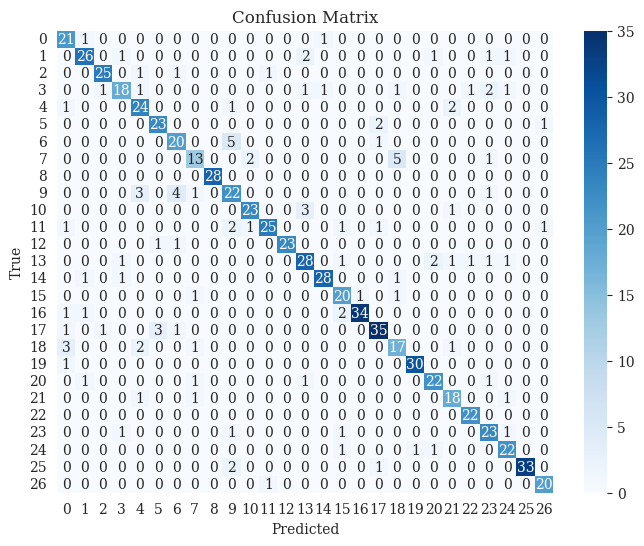

In [63]:
conf_matrix(Y_test,predictions)

ROC AUC score: 0.9222593475057562


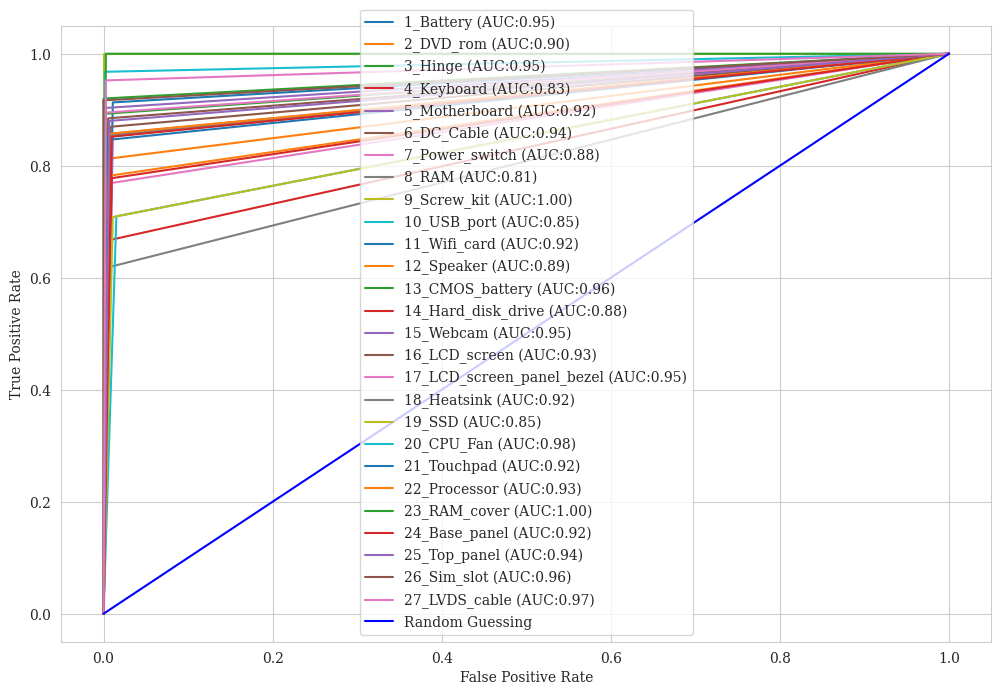

In [64]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(Y_test,predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


# MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet
import tensorflow

In [ ]:
def mobileNet_model(input_shape):
    base_model=MobileNet(weights='imagenet',include_top=False,input_shape = (input_shape))
    model = tensorflow.keras.Sequential([
        base_model,
        tensorflow.keras.layers.Conv2D(128, 3, activation='relu'),
        tensorflow.keras.layers.Dropout(0.2),
        tensorflow.keras.layers.GlobalAveragePooling2D(),
        tensorflow.keras.layers.Dense(27, activation='softmax')
    ])
    model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=50, BATCH_SIZE=32):
    model = None
    input_shape = 150,150,3
    model = mobileNet_model(input_shape)
    results = model.fit_generator(datagen.flow(t_x, t_y, batch_size=BATCH_SIZE),
                              epochs = EPOCHS, validation_data = (val_x,val_y),
                              callbacks= callbacks,
                              verbose = 1, steps_per_epoch= t_x.shape[0] // 128)
    
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [ ]:
checkpoint_path = r'F:\Research Works\Laptop_components\New folder\K-fold-27_mobileNet.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    acc_callback
]

In [ ]:
n_folds=2
epochs = 50
batch_size = 32

mobileNet_model_history = []

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(x_train, y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    resNet50_model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(resNet50_model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(resNet50_model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(resNet50_model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(resNet50_model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

In [ ]:
# sns.set(font_scale=2)
# sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
plt.title('Train Loss vs Val Loss')
plt.plot(resNet50_model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(resNet50_model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(resNet50_model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(resNet50_model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")

plt.legend()
plt.show()

In [ ]:
#Load the model that was saved by ModelCheckpoint
nFoldIncV3Model = load_model(r'F:\Research Works\Laptop_components\New folder\K-fold-27_mobileNet.h5')
preds = nFoldIncV3Model.predict(x_test)
predictions=np.argmax(preds,axis=1)

In [ ]:
from sklearn.metrics import classification_report
Y_test =np.argmax(y_test,axis=1)
print(classification_report(Y_test, predictions))

In [ ]:
report_generate(Y_test, predictions)

In [ ]:
conf_matrix(Y_test,predictions)

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(Y_test,predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
